## Rentables for Project Comp257 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [2]:
LGA = pd.read_excel('data/Rent-Tables-clean-Jun-Quarter-2019.xlsx', sheet_name= 0)
print("Shape of LGA: ",LGA.shape)

Shape of LGA:  (33067, 15)


In [3]:
LGA.replace(to_replace="-",value=10,inplace=True)
LGA.replace(to_replace="s",value=30,inplace=True)
LGA.head()

,GMR (Greater Metropolitan Region),Greater Sydney,Rings,LGA (Local Government Areas),Dwelling Types,Bedroom Numbers,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
0,Total,Total,Total,Total,Total,Total,375,475,600,74871,764400,-0.0104,-0.0104,-0.0778,0.0240
1,Total,Total,Total,Total,Total,Bedsitter,315,390,465,860,8880,-0.0488,0.0000,-0.1739,-0.1088
2,Total,Total,Total,Total,Total,1 Bedroom,340,450,550,12637,105243,-0.0217,-0.0217,-0.1416,0.0235
3,Total,Total,Total,Total,Total,Not Specified,350,440,560,2796,57312,0.0115,-0.0414,-0.0729,-0.2183
4,Total,Total,Total,Total,Total,2 Bedrooms,360,465,610,27859,278716,-0.0510,-0.0312,-0.0779,0.0655


In [4]:
postcode = pd.read_excel('data/Rent-Tables-clean-Jun-Quarter-2019.xlsx', sheet_name=1)

In [5]:
postcode.replace(to_replace="-",value=10,inplace=True)
postcode.replace(to_replace="s",value=30,inplace=True)
print("Shape of postcode: ",postcode.shape)
postcode.head()

Shape of postcode:  (16481, 12)


,Postcode,Dwelling Types,Bedroom Numbers,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
0,1360,Total,Total,10,10,10,10,10,10.0,10.0,10.0,10.0
1,1360,Total,2 Bedrooms,10,10,10,10,10,10.0,10.0,10.0,10.0
2,1360,Flat/Unit,Total,10,10,10,10,10,10.0,10.0,10.0,10.0
3,1360,Flat/Unit,2 Bedrooms,10,10,10,10,10,10.0,10.0,10.0,10.0
4,1790,Total,Total,10,10,10,10,10,10.0,10.0,10.0,10.0


In [6]:
LGA.dtypes

GMR (Greater Metropolitan Region)               object
Greater Sydney                                  object
Rings                                           object
LGA (Local Government Areas)                    object
Dwelling Types                                  object
Bedroom Numbers                                 object
First Quartile Weekly Rent for New Bonds\n$      int64
Median Weekly Rent for New Bonds\n$              int64
Third Quartile Weekly Rent for New Bonds\n$      int64
New Bonds Lodged\nNo.                            int64
Total Bonds Held\nNo.                            int64
Quarterly change in Median Weekly Rent         float64
Annual change in Median Weekly Rent            float64
Quarterly change in New Bonds Lodged           float64
Annual change in New Bonds Lodged              float64
dtype: object

In [7]:
LGA.columns

Index(['GMR (Greater Metropolitan Region)', 'Greater Sydney', 'Rings',
       'LGA (Local Government Areas)', 'Dwelling Types', 'Bedroom Numbers',
       'First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.', 'Quarterly change in Median Weekly Rent',
       'Annual change in Median Weekly Rent',
       'Quarterly change in New Bonds Lodged',
       'Annual change in New Bonds Lodged'],
      dtype='object')

In [8]:
LGA.rename(columns={'GMR (Greater Metropolitan Region)':'GMR',
                    'Greater Sydney':'Greater_Sydney',
                    'LGA (Local Government Areas)':'LGA',
                    'Dwelling Types':'Dwelling_Types',
                    'Bedroom Numbers':'Bedroom_Numbers'},
           inplace=True)

### Renaming Columns and determinig correlation

In [9]:
LGA_clean =  LGA[LGA.Bedroom_Numbers != 'Total']

In [10]:
LGA_clean =  LGA_clean[LGA_clean.Dwelling_Types != 'Total']

In [11]:
LGA_clean = LGA_clean[LGA_clean.LGA != 'Total']

In [12]:
LGA_clean.shape

(20848, 15)

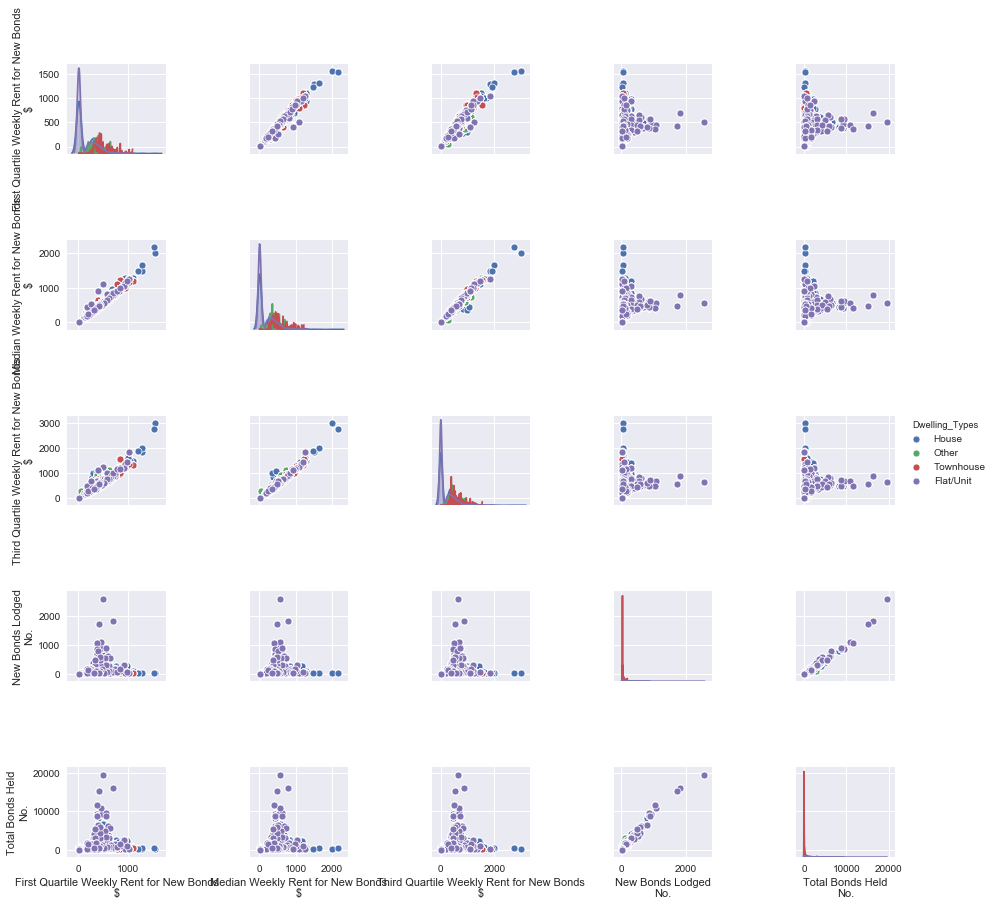

In [13]:
g = sns.pairplot(LGA_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'],hue='Dwelling_Types')

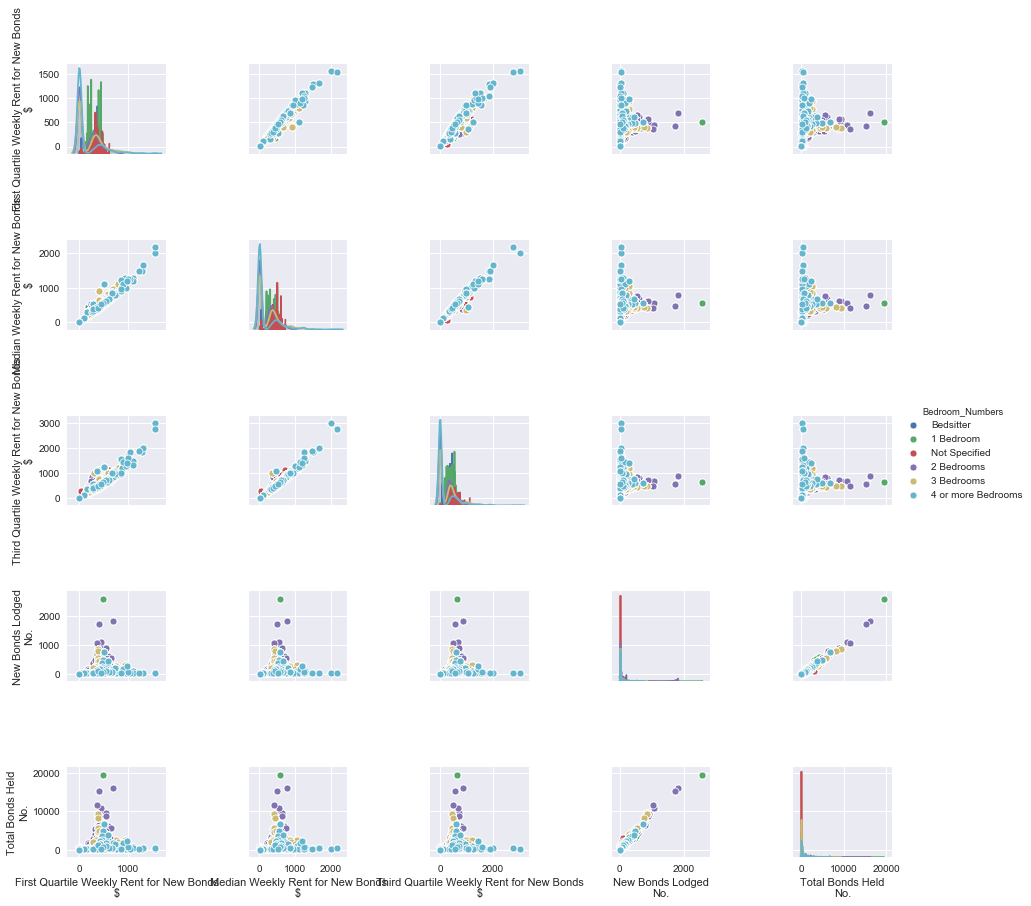

In [14]:
g = sns.pairplot(LGA_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'], hue='Bedroom_Numbers')

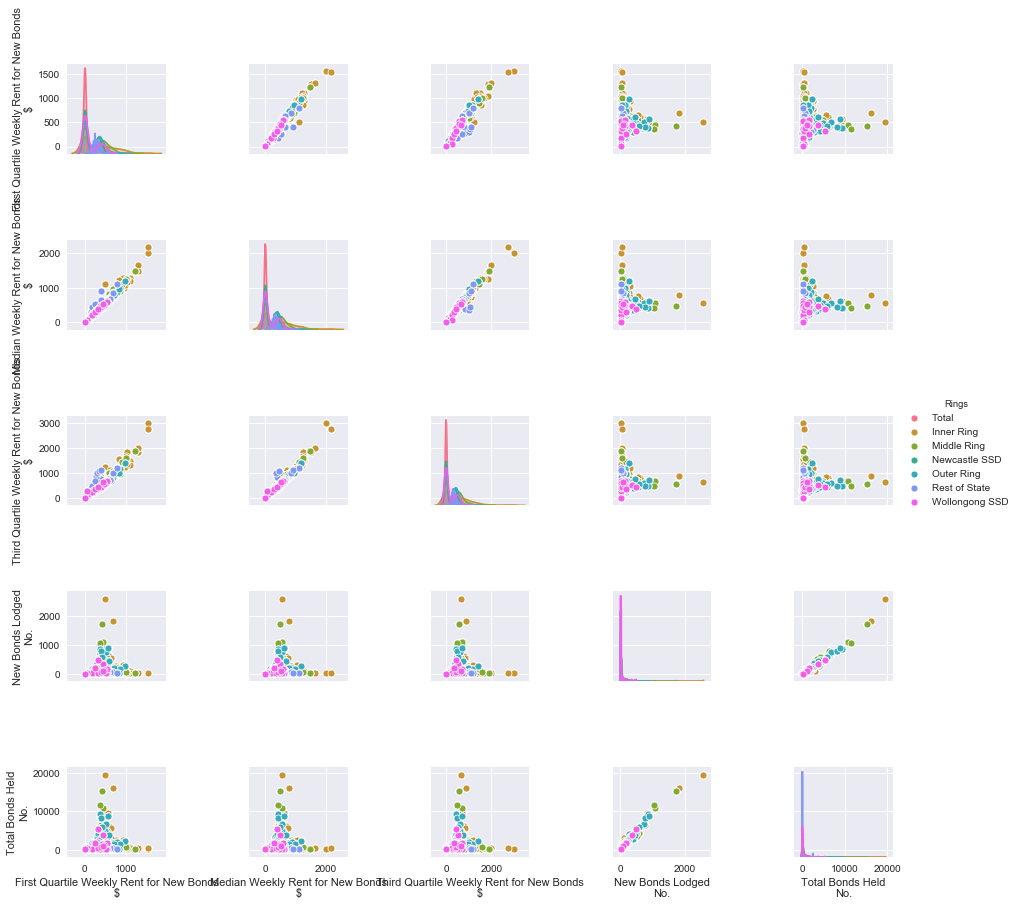

In [15]:
g = sns.pairplot(LGA_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'], hue='Rings')

In [16]:
LGA_clean.describe()

,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
count,20848.000000,20848.000000,20848.00000,20848.000000,20848.000000,20832.000000,20840.000000,20832.000000,20840.000000
mean,127.384881,144.294705,164.21604,35.909823,297.019186,7.058049,7.053787,7.081812,7.100564
std,209.315538,242.789895,285.68111,106.954060,998.913554,4.558111,4.561163,4.527474,4.525275
min,10.000000,10.000000,10.00000,10.000000,10.000000,-0.872100,-0.862500,-0.721500,-0.705100
25%,10.000000,10.000000,10.00000,10.000000,10.000000,0.044400,0.060600,0.387825,0.375000
50%,10.000000,10.000000,10.00000,10.000000,35.000000,10.000000,10.000000,10.000000,10.000000
75%,250.000000,280.000000,310.00000,30.000000,172.000000,10.000000,10.000000,10.000000,10.000000
max,1550.000000,2175.000000,3000.00000,2571.000000,19439.000000,10.000000,10.000000,10.000000,25.000000


In [17]:
LGA_clean1 = LGA_clean.drop(["Quarterly change in Median Weekly Rent", "Annual change in Median Weekly Rent", "Quarterly change in New Bonds Lodged", "Annual change in New Bonds Lodged"], axis =1)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
modelLog = LogisticRegression()

In [20]:
train, test = train_test_split(LGA_clean1,test_size = 0.3,random_state = 142)

In [21]:
LGA_clean1.columns

Index(['GMR', 'Greater_Sydney', 'Rings', 'LGA', 'Dwelling_Types',
       'Bedroom_Numbers', 'First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'],
      dtype='object')

In [22]:
x_train = train.drop(['GMR',
                      'Greater_Sydney',
                      'Rings',
                      'LGA',
                      'Dwelling_Types',
                      'Bedroom_Numbers'],
                     axis = 1)
y_train = train.drop(['GMR',
                      'Greater_Sydney',
                      'Rings','Dwelling_Types',
                      'Bedroom_Numbers', 
                      'First Quartile Weekly Rent for New Bonds\n$',
                      'Median Weekly Rent for New Bonds\n$',
                      'Third Quartile Weekly Rent for New Bonds\n$', 
                      'New Bonds Lodged\nNo.','Total Bonds Held\nNo.'],
                     axis = 1)
x_test = test.drop(['GMR',
                    'Greater_Sydney',
                    'Rings',
                    'LGA',
                    'Dwelling_Types',
                   'Bedroom_Numbers'],
                   axis = 1)
y_test = test.drop(['GMR',
                      'Greater_Sydney',
                      'Rings','Dwelling_Types',
                    'Bedroom_Numbers',
                    'First Quartile Weekly Rent for New Bonds\n$',
                    'Median Weekly Rent for New Bonds\n$',
                    'Third Quartile Weekly Rent for New Bonds\n$',
                    'New Bonds Lodged\nNo.',
                    'Total Bonds Held\nNo.'],
                   axis = 1)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(14593, 5) (14593, 1) (6255, 5) (6255, 1)


In [23]:
modelLog.fit(x_train, y_train)

C:\Users\mukit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mukit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mukit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mukit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
from sklearn.metrics import accuracy_score
y_pred = modelLog.predict(x_test)
accuracy_score(y_test,y_pred)

0.016466826538768985

In [25]:
#Removing warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [26]:
from sklearn.feature_selection import RFE
modelRFE = LogisticRegression()
selector = RFE(modelRFE, 4 ,step=1)
selector.fit(x_train, y_train)
y_pred = selector.predict(x_test)
print("acc on 4 features",accuracy_score(y_test,y_pred))
print(selector.support_)
col_names = x_train.columns
print(col_names[selector.support_])

C:\Users\mukit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mukit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


acc on 4 features 0.019504396482813748
[ True  True  True  True False]
Index(['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.'],
      dtype='object')


C:\Users\mukit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
modelRFE = LogisticRegression()
selector = RFE(modelRFE, 3 ,step=1)
selector.fit(x_train, y_train)
y_pred = selector.predict(x_test)
print("acc on 3 features",accuracy_score(y_test,y_pred))

C:\Users\mukit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mukit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mukit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


acc on 3 features 0.02238209432454037


In [28]:
modelRFE = LogisticRegression()
selector = RFE(modelRFE, 2 ,step=1)
selector.fit(x_train, y_train)
y_pred = selector.predict(x_test)
print("acc on 2 features",accuracy_score(y_test,y_pred))

C:\Users\mukit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mukit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mukit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


acc on 2 features 0.016147082334132694


In [29]:
modelRFE = LogisticRegression()
selector = RFE(modelRFE, 1 ,step=1)
selector.fit(x_train, y_train)
y_pred = selector.predict(x_test)
print("acc on 1 features",accuracy_score(y_test,y_pred))

C:\Users\mukit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mukit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mukit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


acc on 1 features 0.011510791366906475


In [30]:
x_train = train.drop(['GMR',
                      'Greater_Sydney',
                      'Rings',
                      'LGA',
                      'Dwelling_Types',
                      'Bedroom_Numbers'],
                     axis = 1)
y_train = train['Dwelling_Types']
x_test = test.drop(['GMR',
                    'Greater_Sydney',
                    'Rings',
                    'LGA',
                    'Dwelling_Types',
                   'Bedroom_Numbers'],
                   axis = 1)
y_test = test['Dwelling_Types']
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(14593, 5) (14593,) (6255, 5) (6255,)


In [31]:
modelRFE = LogisticRegression()
selector = RFE(modelRFE, 1 ,step=1)
selector.fit(x_train, y_train)
y_pred = selector.predict(x_test)
print("acc on 1 features",accuracy_score(y_test,y_pred))

acc on 1 features 0.31366906474820144


In [37]:
train, test = train_test_split(LGA_clean1,test_size = 0.3,random_state = 142)
x_train = train.drop(['GMR','Greater_Sydney','Rings','LGA','Dwelling_Types'], axis = 1)
y_train = train['Dwelling_Types']
x_test = test.drop(['GMR','Greater_Sydney','Rings','LGA','Dwelling_Types'], axis = 1)
y_test = test['Dwelling_Types']
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
print()

dwelling_types_train = train['Dwelling_Types']
dwelling_types_train = pd.get_dummies(dwelling_types_train)

dwelling_types_test = test['Dwelling_Types']
dwelling_types_test = pd.get_dummies(dwelling_types_test)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

model = LinearRegression()
model.fit(x_train,dwelling_types_train)

y_train_pred = model.predict(x_train)
print("LinearRegression()")
print("Checking on training values")
print("RMSC: ", math.sqrt(mean_squared_error(dwelling_types_train,y_train_pred)))
print("R2: ", r2_score(dwelling_types_train,y_train_pred))
print("MAE: ", mean_absolute_error(dwelling_types_train,y_train_pred))
y_test_pred = model.predict(x_test)
print()
print("Checking on testing values")
print("RMSE: ", mean_squared_error(dwelling_types_test,y_test_pred))
print("R2: ", r2_score(dwelling_types_test,y_test_pred))
print("MAE: ", mean_absolute_error(dwelling_types_test,y_test_pred))
print()

(14593, 6) (14593,) (6255, 6) (6255,)

(14593, 6) (14593,) (6255, 6) (6255,)


ValueError: could not convert string to float: 'Bedsitter'

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import numpy as np
import math 
def mape(y_true,y_pred):
    return np.mean(np.abs((y_true - y_pred)/ y_true))*100

In [ ]:
train, test = train_test_split(LGA_clean1,test_size = 0.2,random_state = 142)
x_train = train.drop(['GMR',
                      'Greater_Sydney',
                      'Rings',
                      'LGA',
                      'Dwelling_Types',
                      'Bedroom_Numbers'],
                     axis = 1)
y_train = train['Dwelling_Types']
x_test = test.drop(['GMR',
                    'Greater_Sydney',
                    'Rings',
                    'LGA',
                    'Dwelling_Types',
                   'Bedroom_Numbers'],
                   axis = 1)
y_test = test['Dwelling_Types']
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model  = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
model  = DecisionTreeClassifier(random_state=0,max_depth=4)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
model  = DecisionTreeClassifier(random_state=0,max_depth=8)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
accuracy_score(y_test,y_pred)

### Data Cleaning postcode dataframe

In [ ]:
postcode.rename(columns={'Bedroom Numbers':'Bedroom_Numbers'}, inplace=True)

In [ ]:
postcode.rename(columns={'Dwelling Types':'Dwelling_Types'}, inplace=True)

In [ ]:
postcode_clean =  postcode[postcode.Bedroom_Numbers != 'Total']

In [ ]:
postcode_clean =  postcode_clean[postcode.Dwelling_Types != 'Total']

In [ ]:
print(postcode_clean.shape)
postcode_clean.head(200)

In [ ]:
postcode_clean.columns

In [ ]:
g = sns.pairplot(postcode_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'],hue='Dwelling_Types')

In [ ]:
g = sns.pairplot(postcode_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'],hue='Bedroom_Numbers')

In [ ]:
dfNB= postcode_clean['New Bonds Lodged\nNo.']
dfNB.plot.hist()

In [ ]:
postcode_clean.describe()

In [ ]:
postcode_clean.columns

In [ ]:
postcode_clean1= postcode_clean.drop(['Quarterly change in Median Weekly Rent',
       'Annual change in Median Weekly Rent',
       'Quarterly change in New Bonds Lodged',
       'Annual change in New Bonds Lodged'],axis=1)

In [ ]:
postcode_clean1.columns

In [ ]:
train, test = train_test_split(postcode_clean1,test_size = 0.3,random_state = 142)
x_train = train.drop([ 'Dwelling_Types', 'Bedroom_Numbers'],axis=1)
y_train = train['Dwelling_Types']
x_test = test.drop([ 'Dwelling_Types', 'Bedroom_Numbers'],axis=1)
y_test = test['Dwelling_Types']
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.feature_selection import RFE
modelRFE = LogisticRegression()
selector = RFE(modelRFE, 4 ,step=1)
selector.fit(x_train, y_train)
y_pred = selector.predict(x_test)
print("acc on 4 features",accuracy_score(y_test,y_pred))

In [ ]:
modelRFE = LogisticRegression()
selector = RFE(modelRFE, 3 ,step=1)
selector.fit(x_train, y_train)
y_pred = selector.predict(x_test)
print("acc on 3 features",accuracy_score(y_test,y_pred))

In [ ]:
modelRFE = LogisticRegression()
selector = RFE(modelRFE, 2 ,step=1)
selector.fit(x_train, y_train)
y_pred = selector.predict(x_test)
print("acc on 2 features",accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model  = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model  = DecisionTreeClassifier(random_state=0,max_depth=2)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
model  = DecisionTreeClassifier(random_state=0,max_depth=4)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
model  = DecisionTreeClassifier(random_state=0,max_depth=8)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
accuracy_score(y_test,y_pred)